In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [16]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [17]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [18]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [19]:
df_fake["class"] = 0
df_true["class"] = 1

Removing last 10 rows from both the dataset, for manual testing  

In [20]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [21]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [22]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [23]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\jeswa\AppData\Local\Temp\ipykernel_5052\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\jeswa\AppData\Local\Temp\ipykernel_5052\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [24]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [25]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [26]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the main fake and true dataframe

In [27]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [28]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [29]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [30]:
df.isnull().sum()

text     0
class    0
dtype: int64

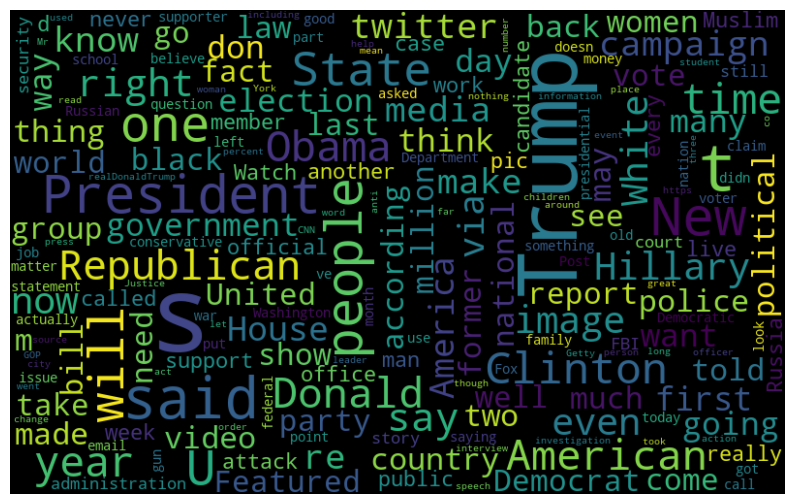

In [31]:
from wordcloud import WordCloud

fake_data = df_marge[df_marge["class"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

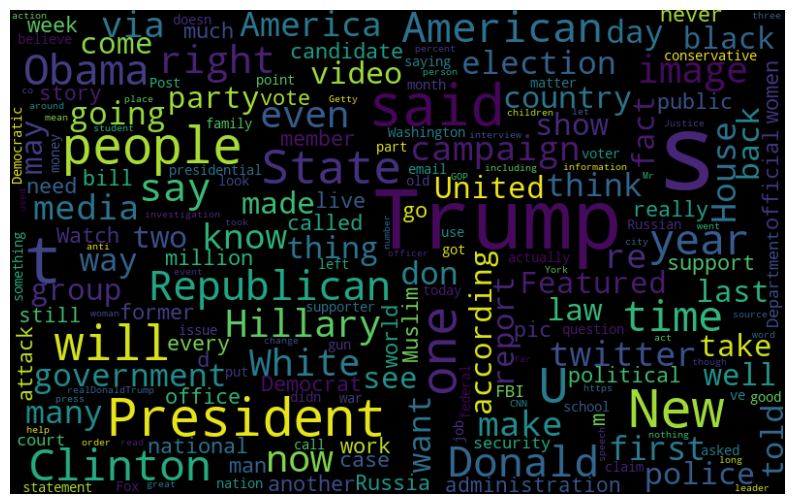

In [32]:
from wordcloud import WordCloud

real_data = df_marge[df_marge["class"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Randomly shuffling the dataframe 

In [33]:
df = df.sample(frac = 1)

In [34]:
df.head()

,text,class
8314,If you didn t think Republicans could stoop an...,0
21869,https://fedup.wpengine.com/wp-content/uploads/...,0
5274,WASHINGTON (Reuters) - The longest-serving U.S...,1
2618,WASHINGTON (Reuters) - President Donald Trump ...,1
17239,Yuck! It s bad enough that China had a dog mea...,0


In [35]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [36]:
df.columns

Index(['text', 'class'], dtype='object')

In [37]:
df.head()

,text,class
0,If you didn t think Republicans could stoop an...,0
1,https://fedup.wpengine.com/wp-content/uploads/...,0
2,WASHINGTON (Reuters) - The longest-serving U.S...,1
3,WASHINGTON (Reuters) - President Donald Trump ...,1
4,Yuck! It s bad enough that China had a dog mea...,0


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [38]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [39]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [40]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert text to vectors

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Isolation Forest

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
dct = dict()

In [45]:
isolation_forest = IsolationForest(contamination=0.1)

In [46]:
isolation_forest.fit(xv_train, y_train)

IsolationForest(contamination=0.1)

In [47]:
anomaly_scores = isolation_forest.decision_function(xv_test)

In [48]:
predictions = np.where(anomaly_scores < 0, -1, 1)

In [49]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
dct['Isolation Forest'] = round(accuracy_score(y_test, predictions)*100,2)

Accuracy: 0.43787878787878787


In [50]:
print(classification_report(y_test,predictions,zero_division=1,digits=5))


              precision    recall  f1-score   support

          -1    0.00000   1.00000   0.00000         0
           0    1.00000   0.00000   0.00000      5773
           1    0.48730   0.90196   0.63275      5447

    accuracy                        0.43788     11220
   macro avg    0.49577   0.63399   0.21092     11220
weighted avg    0.75110   0.43788   0.30718     11220



### 2. Nearest Centroid

In [51]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report

In [52]:
nc = NearestCentroid()

In [53]:
nc.fit(xv_train, y_train)


NearestCentroid()

In [54]:
pred_nc = nc.predict(xv_test)

In [55]:
accuracy = nc.score(xv_test, y_test)
print("Accuracy:", accuracy)
dct['Nearest Centroid'] = round(nc.score(xv_test, y_test)*100,2)
print("Classification Report:")
print(classification_report(y_test,pred_nc,digits=5))

Accuracy: 0.9283422459893048
Classification Report:
              precision    recall  f1-score   support

           0    0.94501   0.91391   0.92920      5773
           1    0.91183   0.94364   0.92746      5447

    accuracy                        0.92834     11220
   macro avg    0.92842   0.92877   0.92833     11220
weighted avg    0.92890   0.92834   0.92836     11220



### 3. Perceptron

In [56]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report

In [57]:
perceptron = Perceptron()

In [58]:
perceptron.fit(xv_train, y_train)


Perceptron()

In [59]:
pred_perceptron = perceptron.predict(xv_test)

In [60]:
print("Perceptron Score:", perceptron.score(xv_test, y_test))
dct['Perceptron'] = round(perceptron.score(xv_test, y_test)*100,2)

Perceptron Score: 0.9910873440285205


In [61]:
print("Classification Report:")
print(classification_report(y_test, pred_perceptron,digits=5))

Classification Report:
              precision    recall  f1-score   support

           0    0.98880   0.99394   0.99136      5773
           1    0.99354   0.98807   0.99080      5447

    accuracy                        0.99109     11220
   macro avg    0.99117   0.99100   0.99108     11220
weighted avg    0.99110   0.99109   0.99109     11220



### 4. BernoulliNB

In [62]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score


In [63]:
Bernoulli = BernoulliNB()

In [64]:
Bernoulli.fit(xv_train, y_train)


BernoulliNB()

In [65]:
pred_nb = Bernoulli.predict(xv_test)

In [66]:
accuracy = accuracy_score(y_test, pred_nb)
print("Accuracy:", accuracy)
dct['Bernoulli NB'] = round(accuracy_score(y_test, pred_nb)*100,2)
print(classification_report(y_test,pred_nb,digits=5))

Accuracy: 0.9407308377896613
              precision    recall  f1-score   support

           0    0.95968   0.92361   0.94130      5773
           1    0.92214   0.95888   0.94015      5447

    accuracy                        0.94073     11220
   macro avg    0.94091   0.94124   0.94073     11220
weighted avg    0.94146   0.94073   0.94074     11220



### 5. Multinomial NB

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [68]:
nb_classifier = MultinomialNB()

In [69]:
nb_classifier.fit(xv_train, y_train)

MultinomialNB()

In [70]:
pred_nb = nb_classifier.predict(xv_test)

In [71]:
accuracy = accuracy_score(y_test, pred_nb)
print("Accuracy:", accuracy)
dct['Multinomial NB'] = round(accuracy_score(y_test, pred_nb)*100,2)
print(classification_report(y_test,pred_nb,digits=5))

Accuracy: 0.9366310160427808
              precision    recall  f1-score   support

           0    0.92826   0.95029   0.93914      5773
           1    0.94595   0.92216   0.93390      5447

    accuracy                        0.93663     11220
   macro avg    0.93710   0.93622   0.93652     11220
weighted avg    0.93685   0.93663   0.93660     11220



### 6. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [73]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [74]:
knn_classifier.fit(xv_train, y_train)


KNeighborsClassifier()

In [75]:
pred_knn = knn_classifier.predict(xv_test)

In [76]:
accuracy = accuracy_score(y_test, pred_knn)
print("Accuracy:", accuracy)
dct['KNN'] = round(accuracy_score(y_test, pred_knn)*100,2)
print(classification_report(y_test,pred_knn,digits=5))

Accuracy: 0.6871657754010695
              precision    recall  f1-score   support

           0    0.62621   0.97246   0.76184      5773
           1    0.92949   0.38480   0.54427      5447

    accuracy                        0.68717     11220
   macro avg    0.77785   0.67863   0.65306     11220
weighted avg    0.77345   0.68717   0.65622     11220



([<matplotlib.axis.YTick at 0x2c08708b610>,
 [Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 89, '89'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

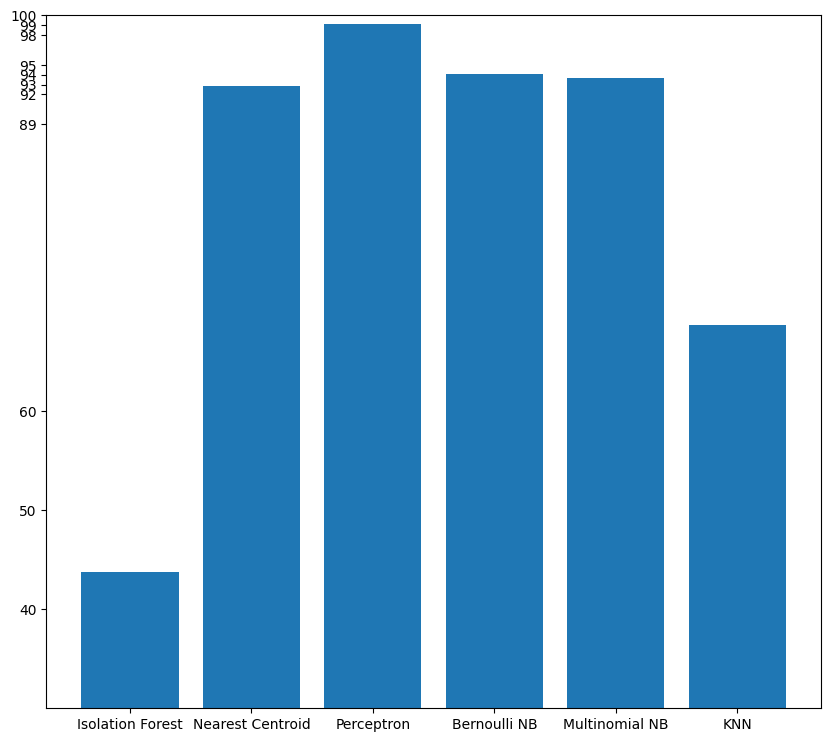

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(30,100)
plt.yticks((40, 50, 60, 89, 92, 93, 94, 95, 98, 99, 100))

# Model Testing With Manual Entry

### News

In [78]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_IF = isolation_forest.predict(new_xv_test)
    pred_NC = nc.predict(new_xv_test)
    pred_Perc = perceptron.predict(new_xv_test)
    pred_BRNB = Bernoulli.predict(new_xv_test)
    pred_NB = nb_classifier.predict(new_xv_test)
    pred_KNN = knn_classifier.predict(new_xv_test)

    return print("\n\nIF Prediction: {} \nNC Prediction: {} \nPerc Prediction: {} \nBRNB Prediction: {} \nNB Prediction: {} \nKNN Prediction: {}".format(output_lable(pred_IF[0]), 
                                                                                                              output_lable(pred_NC[0]), 
                                                                                                              output_lable(pred_Perc[0]),
                                                                                                              output_lable(pred_BRNB[0]),
                                                                                                              output_lable(pred_NB[0]),
                                                                                                              output_lable(pred_KNN[0])))

In [85]:
news = str(input())
manual_testing(news)



IF Prediction: Not A Fake News 
NC Prediction: Not A Fake News 
Perc Prediction: Not A Fake News 
BRNB Prediction: Not A Fake News 
NB Prediction: Not A Fake News 
KNN Prediction: Fake News
